# Capstone project: Providing data-driven suggestions for HR

**Understand the business scenario and problem**  
The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that **predicts whether or not an employee will leave the company.**

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Imports
* packages
* dataset

In [321]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score, roc_curve
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

In [322]:
df = pd.read_csv("HR_capstone_dataset.csv")

## Data Exploration (EDA and Data Cleaning)
* Understand variable
* Clean dataset (missing data, redundant data, outliers)

**Gather basic information about data**

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [324]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [325]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

**Check missing values**

In [326]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

**Check duplicates**

In [327]:
df[df.duplicated()].sort_values(by = ["satisfaction_level","last_evaluation"])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
13283,1.00,0.86,2,264,3,0,0,0,IT,medium
13089,1.00,0.88,6,201,4,0,0,0,technical,low
12902,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [328]:
df.drop_duplicates(inplace = True)

**Check Outlier**

In [329]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


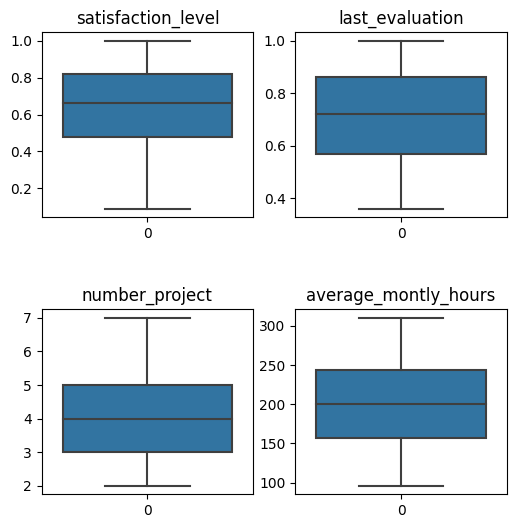

In [330]:
fig, ax = plt.subplots(2,2, figsize = (6,6))
c = 0
for i in range(2):
  for j in range(2):
    sns.boxplot(df.iloc[:,c], ax= ax[i,j])
    ax[i,j].set_title(df.columns[c])
    c += 1

plt.subplots_adjust(hspace=0.5)
plt.show()
  

**Check Data Relationship**

<ipython-input-331-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

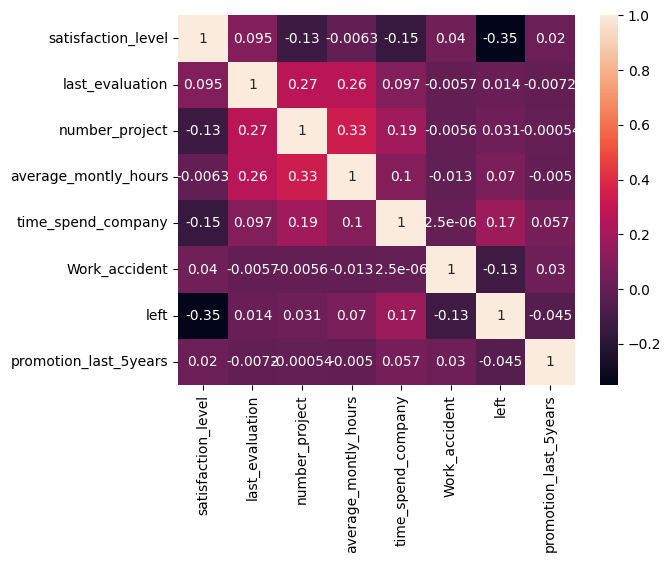

In [331]:
sns.heatmap(df.corr(), annot = True)

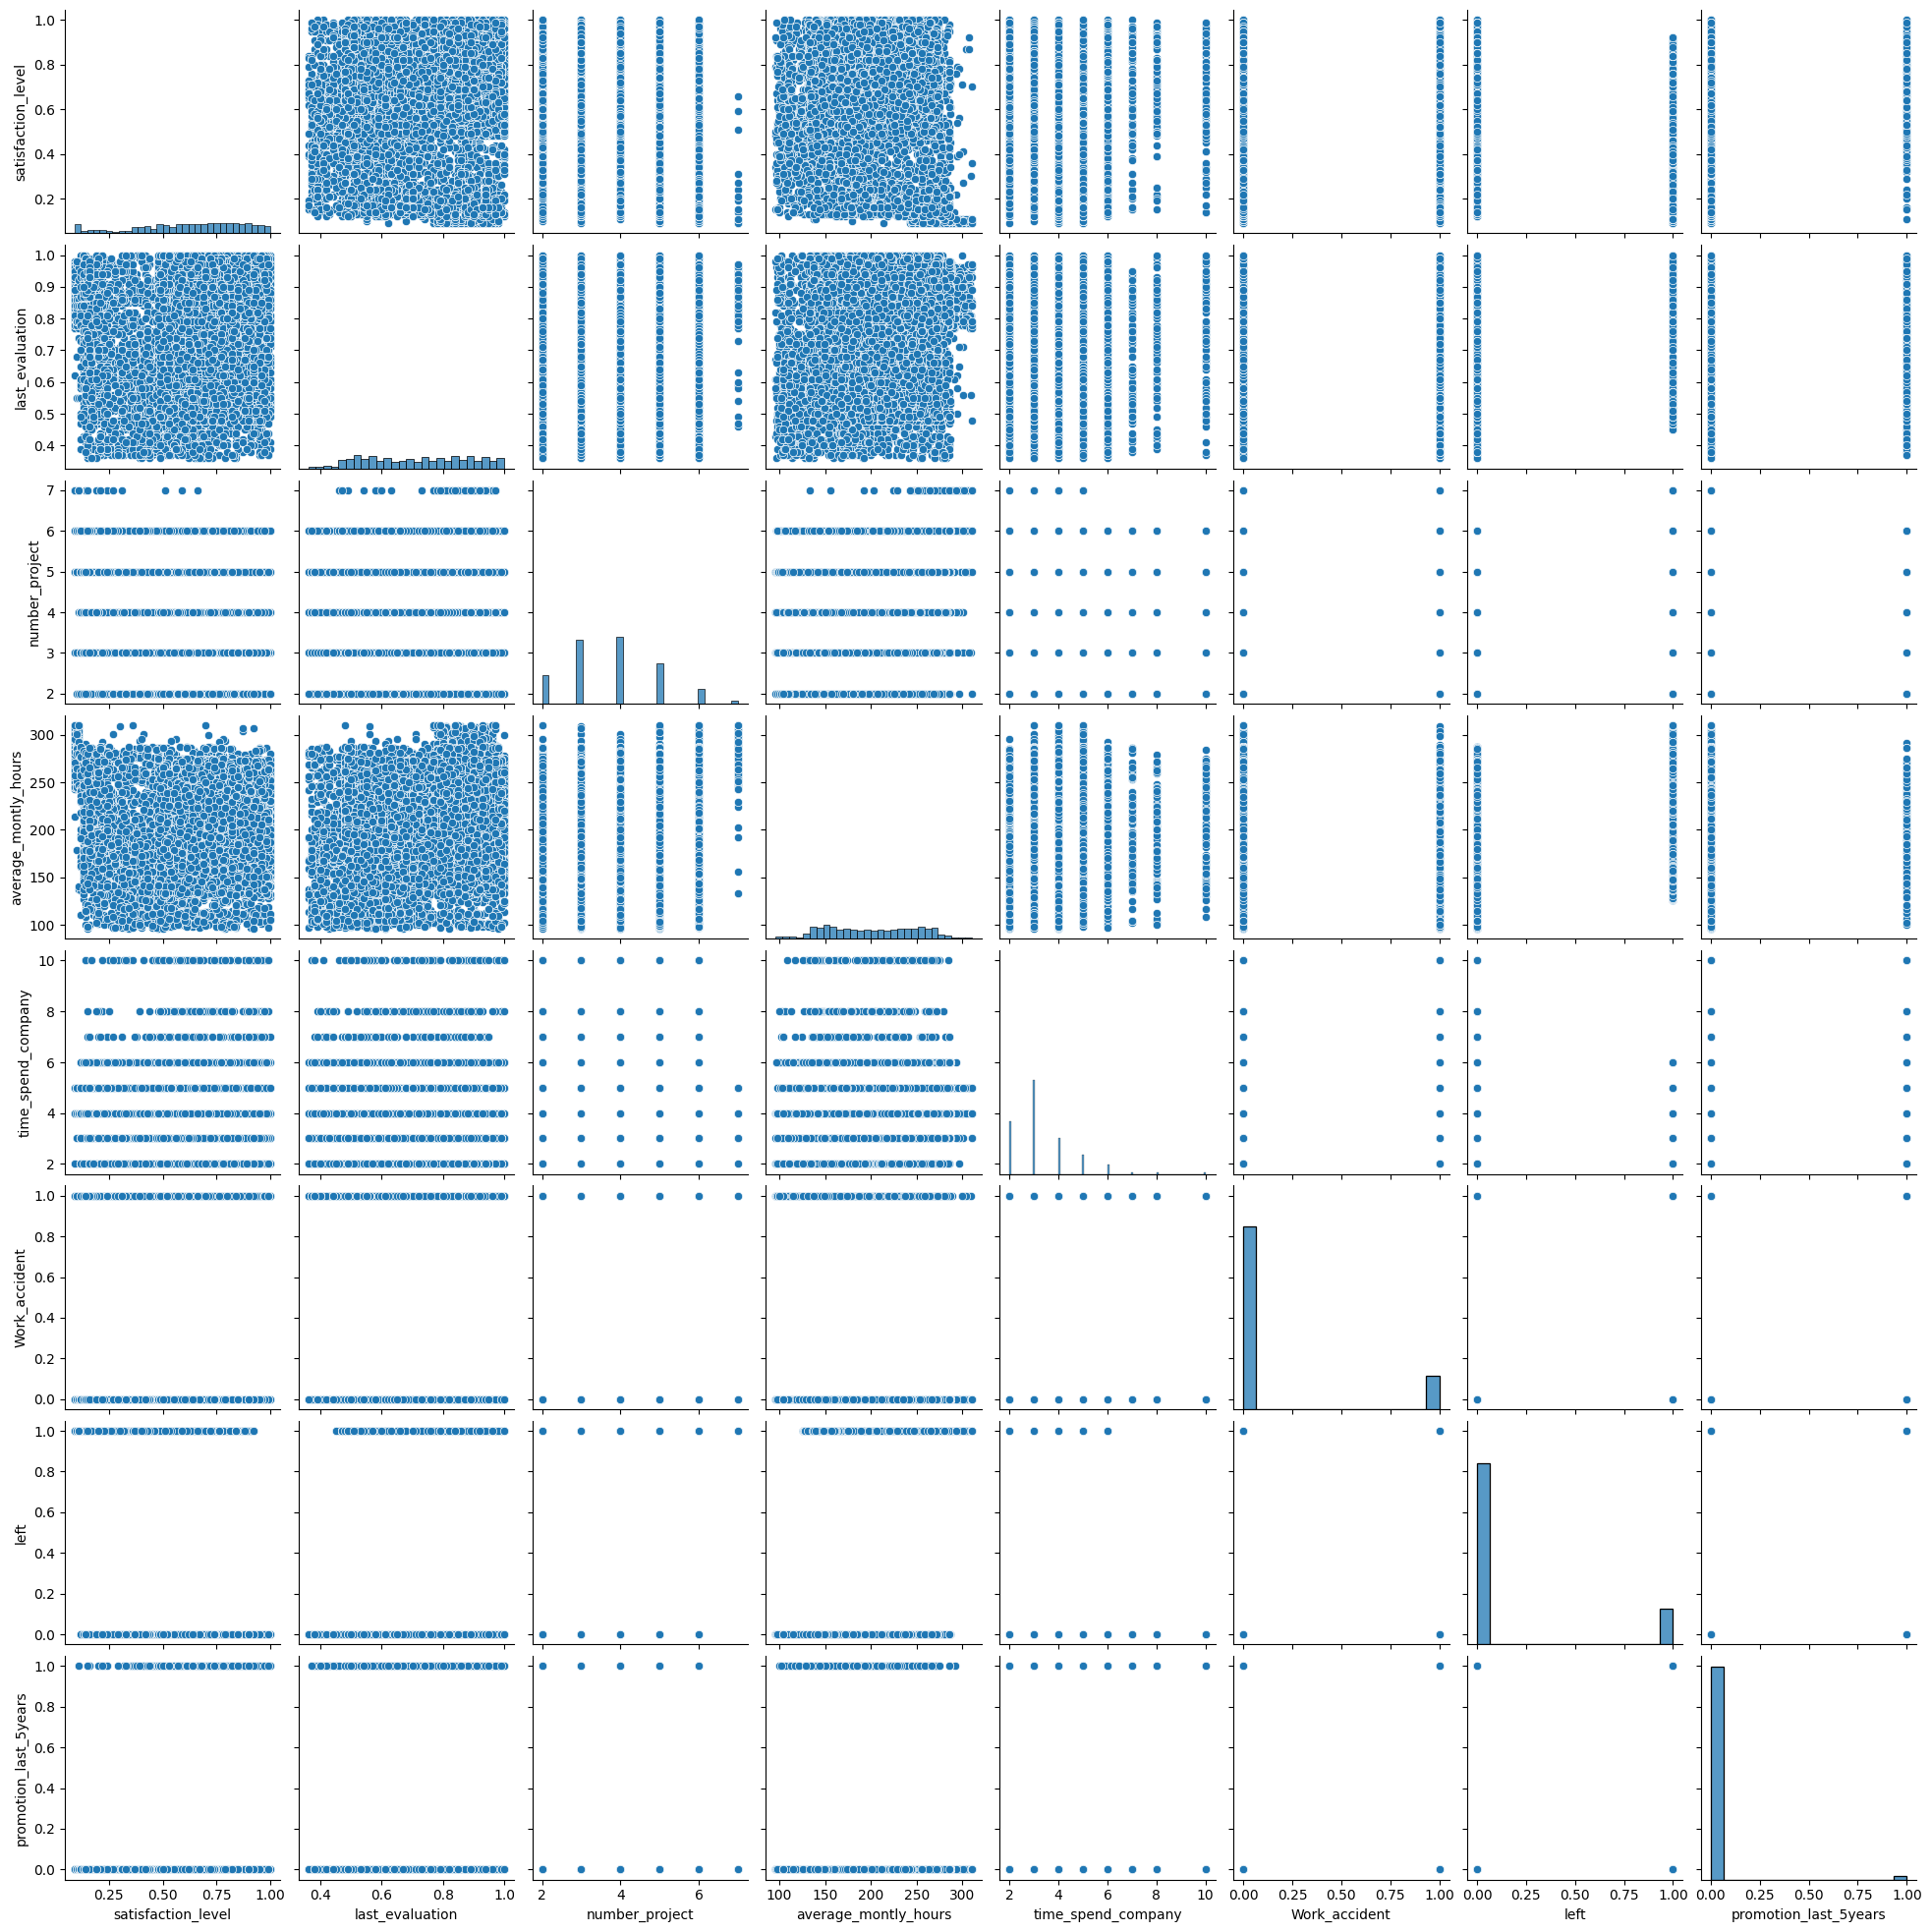

In [332]:
sns.pairplot(df)

In [333]:
df["left"].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

* Target variable class is quite imbalance

**Encoding**

In [334]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [335]:
df["Department"].value_counts(normalize = True)

sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: Department, dtype: float64

**Perform One-Hot Encoding on norminal categorical data**

In [336]:
dummies = pd.get_dummies(df["Department"])

In [337]:
df = df.assign(**dummies).drop("Department", axis=1)

In [338]:
df.shape

(11991, 19)

**Peform Label Encoding on ordinal categorical data**

In [339]:
df['salary'] = np.where(df['salary'] == 'high', 2, np.where(df['salary'] == 'medium', 1, 0))

In [340]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Construct Stage

In [341]:
y = df["left"]
X = df.drop("left", axis=1)

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y)

###Logistic Regression
  
  
  assumption of logistic regression
*  Outcome variable is categorical
* Observations are independent of each other
* No severe multicollinearity among X variables
* No extreme outliers
* Linear relationship between each X variable and the logit of the outcome variable
* Sufficiently large sample size

In [343]:
import statsmodels.api as sm

logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.357947
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                 8393
Model:                          Logit   Df Residuals:                     8375
Method:                           MLE   Df Model:                           17
Date:                Tue, 06 Jun 2023   Pseudo R-squ.:                  0.2039
Time:                        19:02:41   Log-Likelihood:                -3004.2
converged:                       True   LL-Null:                       -3773.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3321   2.14e+06  -1.55e-07      1.000   -4.19e+06    4.19e+06
satisfaction_level       -3.9898      0.144    -27.745      0.000      -4.272      -3.708
last_evaluation           0.6865      0.215      3.190      0.001       0.265       1.108
number_project           -0.2722      0.031     -8.765      0.000      -0.333      -0.211
average_montly_hours      0.0042      0.001      5.618      0.000       0.003       0.006
time_spend_company        0.3131      0.024     12.981      0.000       0.266       0.360
Work_accident            -1.3749      0.132    -10.437      0.000      -1.633      -1.117
promotion_last_5years    -1.3976      0.448     -3.122      0.002      -2.275      -0.520
salary                   -0.6436      0.058    -11.190      0.000      -0.756      -0.531
IT                       -0.0516   2.14e+06  -2.41e-08      1.000   -4.19e+06    4.19e+06
RandD                    -0.4232   2.14e+06  -1.98e-07      1.000   -4.19e+06    4.19e+06
accounting                0.0007   2.14e+06   3.06e-10      1.000   -4.19e+06    4.19e+06
hr                        0.1916   2.14e+06   8.95e-08      1.000   -4.19e+06    4.19e+06
management               -0.2367   2.14e+06  -1.11e-07      1.000   -4.19e+06    4.19e+06
marketing                -0.0125   2.14e+06  -5.83e-09      1.000   -4.19e+06    4.19e+06
product_mng              -0.0855   2.14e+06     -4e-08      1.000   -4.19e+06    4.19e+06
sales                    -0.0269   2.14e+06  -1.26e-08      1.000   -4.19e+06    4.19e+06
support                   0.1867   2.14e+06   8.72e-08      1.000   -4.19e+06    4.19e+06
technical                 0.1255   2.14e+06   5.86e-08      1.000   -4.19e+06    4.19e+06
=========================================================================================
"""

In [344]:
p_values = result.pvalues[1:]  

feature_p_values = pd.DataFrame({'Feature': X_train.columns, 'P-value': p_values})

feature_p_values = feature_p_values.sort_values('P-value', ascending=True).reset_index(drop=True)

print(feature_p_values)

                  Feature        P-value
0      satisfaction_level  2.012754e-169
1      time_spend_company   1.566017e-38
2                  salary   4.570541e-29
3           Work_accident   1.675265e-25
4          number_project   1.862104e-18
5    average_montly_hours   1.927148e-08
6         last_evaluation   1.422001e-03
7   promotion_last_5years   1.794154e-03
8                   RandD   9.999998e-01
9              management   9.999999e-01
10                     hr   9.999999e-01
11                support   9.999999e-01
12              technical   1.000000e+00
13            product_mng   1.000000e+00
14                     IT   1.000000e+00
15                  sales   1.000000e+00
16              marketing   1.000000e+00
17             accounting   1.000000e+00


* Only 7 features are significant (α = 0.05)
1. satisfaction level
2. time_spend_company
3. Work_accident
4. average_montly_hours
5. number_project
6. promotion_last_5years
7. last_evaluation

In [287]:
predicted_probs = result.predict(sm.add_constant(X_test))

predicted_labels = (predicted_probs > 0.5).astype(int)

f1 = classification_report(y_test, predicted_labels)

print(f1)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3001
           1       0.49      0.19      0.27       597

    accuracy                           0.83      3598
   macro avg       0.67      0.58      0.59      3598
weighted avg       0.79      0.83      0.80      3598



**Using Sklearn**
  * Using only significant features
  * Tuning hyperparameter

In [288]:
sig_feature = feature_p_values.loc[feature_p_values["P-value"] <= 0.05, "Feature"]

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X[sig_feature],y,test_size=0.3, stratify=y)

In [290]:
logreg = LogisticRegression()
params = {
    "C" : np.linspace(0.001,0.01,50),
    "class_weight":[{0:0.8, 1:0.2}, "balanced"],
    "max_iter":[10000]
}

kf = KFold(n_splits = 5)
logreg_cv = GridSearchCV(logreg, params, cv=kf, scoring="f1")
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([0.001     , 0.00118367, 0.00136735, 0.00155102, 0.00173469,
       0.00191837, 0.00210204, 0.00228571, 0.00246939, 0.00265306,
       0.00283673, 0.00302041, 0.00320408, 0.00338776, 0.00357143,
       0.0037551 , 0.00393878, 0.00412245, 0.00430612, 0.0044898 ,
       0.00467347, 0.0048...40816,
       0.00559184, 0.00577551, 0.00595918, 0.00614286, 0.00632653,
       0.0065102 , 0.00669388, 0.00687755, 0.00706122, 0.0072449 ,
       0.00742857, 0.00761224, 0.00779592, 0.00797959, 0.00816327,
       0.00834694, 0.00853061, 0.00871429, 0.00889796, 0.00908163,
       0.00926531, 0.00944898, 0.00963265, 0.00981633, 0.01      ]),
                         'class_weight': [{0: 0.8, 1: 0.2}, 'balanced'],
                         'max_iter': [10000]},
             scoring='f1')

In [291]:
y_pred = logreg_cv.predict(X_test)
y_pred_probs = logreg_cv.predict_proba(X_test)

print(classification_report(y_test,y_pred))
print("Best Parameters :",logreg_cv.best_params_)
print("Best F1 Score :" ,logreg_cv.best_score_)

              precision    recall  f1-score   support

           0       0.96      0.75      0.84      3001
           1       0.41      0.86      0.55       597

    accuracy                           0.77      3598
   macro avg       0.68      0.80      0.70      3598
weighted avg       0.87      0.77      0.80      3598

Best Parameters : {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000}
Best F1 Score : 0.541962220854245


* In this case target variable are imbalance

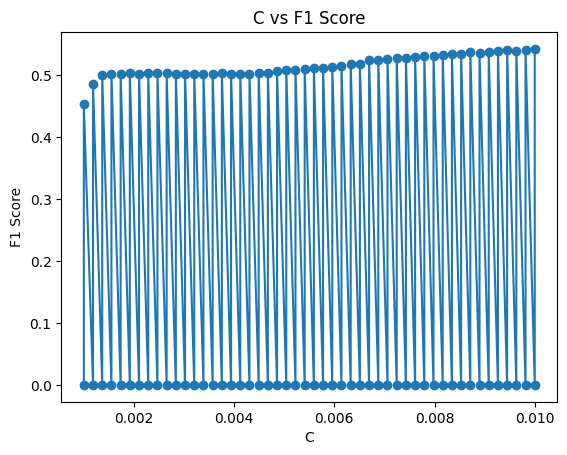

Best Parameters : {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10000}


In [292]:
C_values = [params['C'] for params in logreg_cv.cv_results_['params']]
f1_scores = logreg_cv.cv_results_['mean_test_score']

plt.plot(C_values, f1_scores, marker='o')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.title('C vs F1 Score')
plt.show()
print("Best Parameters :",logreg_cv.best_params_)

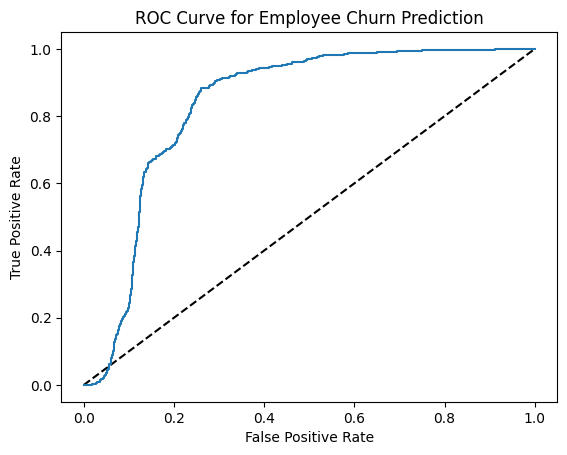

AUC Score : 83.51 %
Best F1 Score : 0.54


In [293]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Employee Churn Prediction')
plt.show()

print("AUC Score :",round(roc_auc_score(y_test, y_pred_probs[:,1])*100,2),"%")
print("Best F1 Score :" ,round(logreg_cv.best_score_,2))

* Using F1 Score to measure balance between precision and recall in imbalance target feature case
* AUC Indicated that majority of model true positive rate are greater than false positive rate in different threshold


### Decision Tree

In [294]:
parameters = {'max_depth': np.arange(3,6),
              'min_samples_split':np.arange(10,100,5),
              'min_samples_leaf':np.arange(10,100,5)}

In [295]:
clf = DecisionTreeClassifier()
kf = KFold(n_splits = 6)
tree_cv = RandomizedSearchCV(clf, parameters, cv=kf, scoring = 'f1')
tree_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([3, 4, 5]),
                                        'min_samples_leaf': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95]),
                                        'min_samples_split': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])},
                   scoring='f1')

In [296]:
y_pred = tree_cv.predict(X_test)
y_pred_proba = tree_cv.predict_proba(X_test)

In [297]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3001
           1       0.93      0.90      0.92       597

    accuracy                           0.97      3598
   macro avg       0.96      0.94      0.95      3598
weighted avg       0.97      0.97      0.97      3598



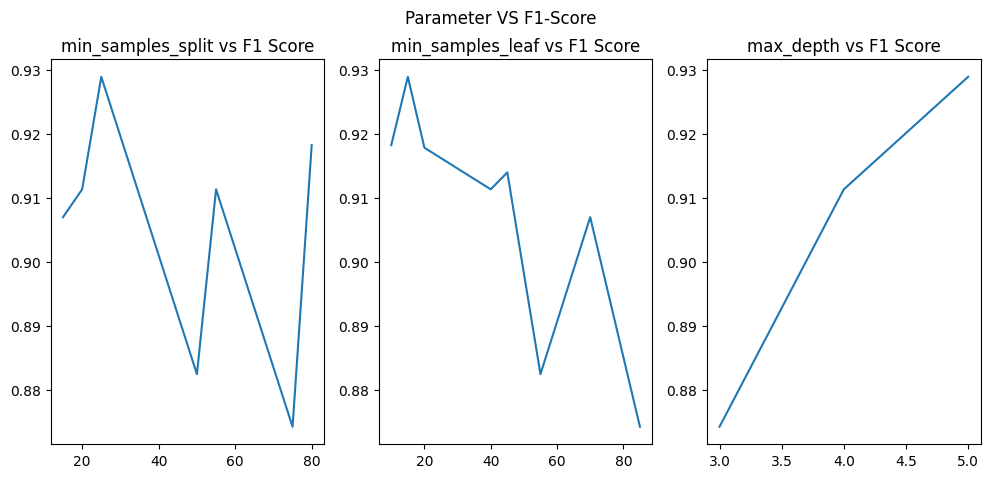

In [298]:
fig, axs = plt.subplots(1,3, figsize = (12,5))

fig.suptitle("Parameter VS F1-Score")
c=0
for param in tree_cv.cv_results_["params"][0].keys():
  x = [params[param] for params in tree_cv.cv_results_["params"]]
  y = tree_cv.cv_results_['mean_test_score']

  score = dict(zip(x,y))
  score = dict(sorted(score.items()))
  axs[c].plot(score.keys(), score.values())
  axs[c].set_title(f"{param} vs F1 Score")
  c += 1

In [299]:
for key in tree_cv.best_params_.keys():
  print(f"best {key} is {tree_cv.best_params_[key]}")

best min_samples_split is 25
best min_samples_leaf is 15
best max_depth is 5


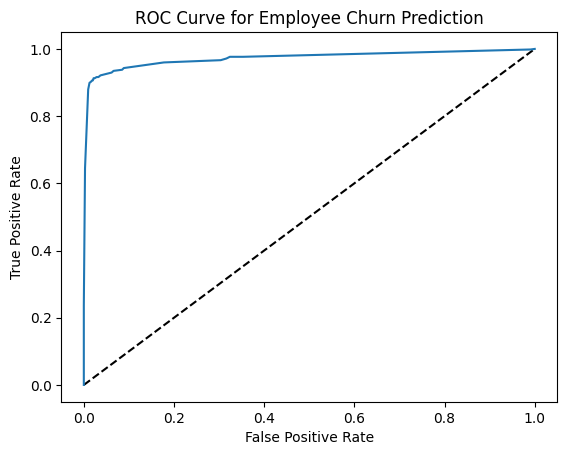

AUC Score : 97.3 %
Best F1 Score : 0.93


In [300]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Employee Churn Prediction')
plt.show()

print("AUC Score :",round(roc_auc_score(y_test, y_pred_proba[:,1]),3)*100,"%")
print("Best F1 Score :" , round(tree_cv.best_score_,2))

### Random Forest

In [301]:
parameters = {'max_depth': np.arange(10,100,5),
              'min_samples_split':np.arange(10,100,5),
              'min_samples_leaf':np.arange(10,100,5),
              'n_estimators': np.arange(10,100,5)}

In [302]:
rf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(rf, parameters, cv=kf, scoring = 'f1')
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95]),
                                        'min_samples_leaf': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95]),
                                        'min_samples_split': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95]),
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])},
                   scoring='f1')

In [303]:
y_pred = rf_cv.predict(X_test)
y_pred_proba = rf_cv.predict_proba(X_test)

In [304]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3001
           1       0.96      0.90      0.93       597

    accuracy                           0.98      3598
   macro avg       0.97      0.94      0.96      3598
weighted avg       0.98      0.98      0.98      3598



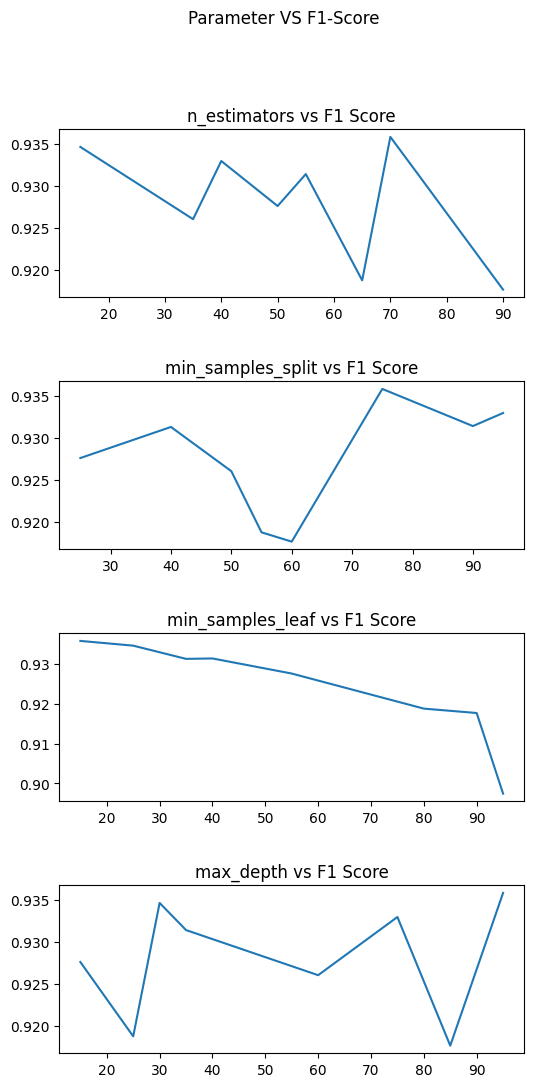

In [305]:
fig, axs = plt.subplots(4,1, figsize = (6,12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Parameter VS F1-Score")
c=0
for param in rf_cv.cv_results_["params"][0].keys():
  x = [params[param] for params in rf_cv.cv_results_["params"]]
  y = rf_cv.cv_results_['mean_test_score']

  score = dict(zip(x,y))
  score = dict(sorted(score.items()))
  axs[c].plot(score.keys(), score.values())
  axs[c].set_title(f"{param} vs F1 Score")
  c += 1

In [306]:
for key in rf_cv.best_params_.keys():
  print(f"best {key} is {rf_cv.best_params_[key]}")

best n_estimators is 70
best min_samples_split is 75
best min_samples_leaf is 15
best max_depth is 95


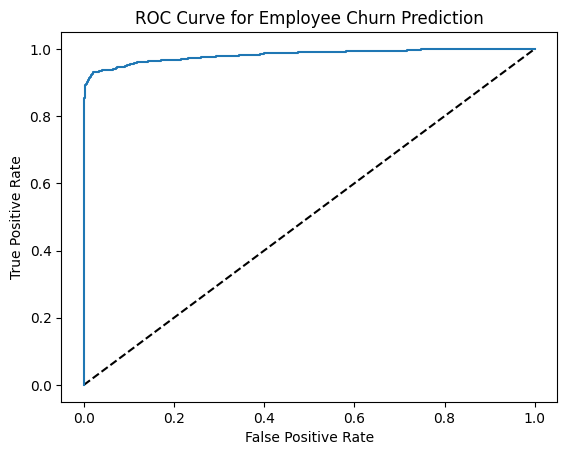

AUC Score : 98.16 %
Best F1 Score : 0.94


In [307]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Employee Churn Prediction')
plt.show()

print("AUC Score :",round(roc_auc_score(y_test, y_pred_proba[:,1])*100,2),"%")
print("Best F1 Score :" , round(rf_cv.best_score_,2))

## Result

In [308]:
models = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],"F1-Score":[round(logreg_cv.best_score_,2),round(tree_cv.best_score_,2),round(rf_cv.best_score_,2)]})

<Axes: xlabel='Model', ylabel='F1-Score'>

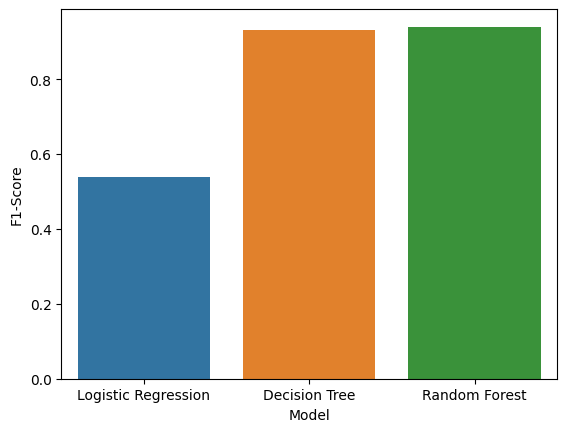

In [309]:
sns.barplot(data= models, x="Model", y="F1-Score")

* Both the decision tree and random forest algorithms are yielding similar scores.
* So I will choose the decision tree due to its lower complexity and lower computational cost. 

In [378]:
best_model = tree_cv.best_estimator_

dot_data = export_graphviz(best_model, out_file=None,
                           feature_names=sig_feature,
                           class_names=['stay','left'],
                           filled=True, rounded=True,
                           special_characters=True
                           )

graph = graphviz.Source(dot_data)

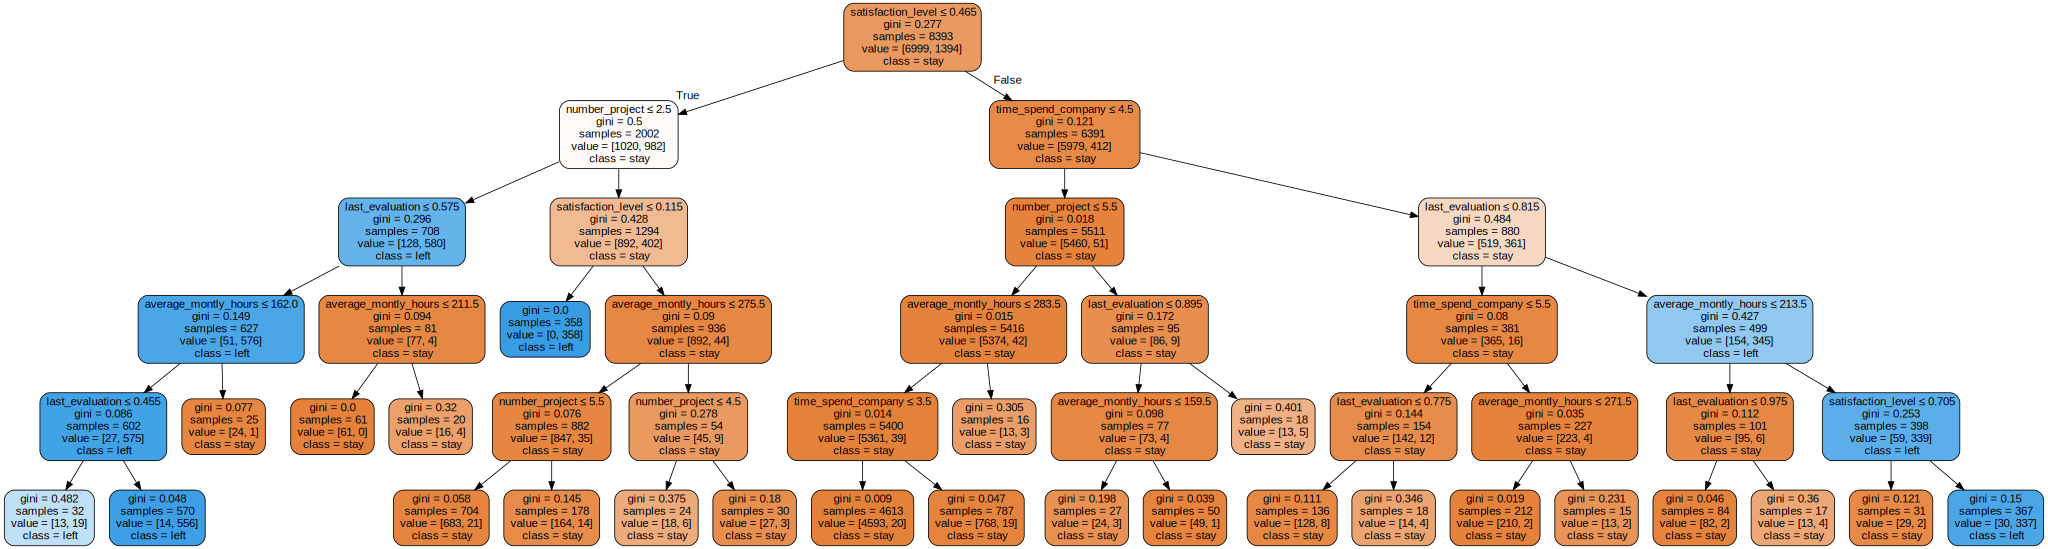

In [379]:
graph.view()
display(graph)

**Insight**

**Seven factors that have an impact on employee churn rate**


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
average_monthly_hours|Average number of hours employee worked per month|
number_project|Number of projects employee contributes to|
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
last_evaluation|Score of employee's last performance review [0&ndash;1]|